In [1]:
import numpy as np
import matplotlib.pyplot as plt

#importing sample image from skimage
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

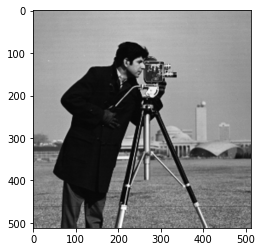

In [2]:
#sample image init
image = camera()
plt.imshow(image, cmap='gray')

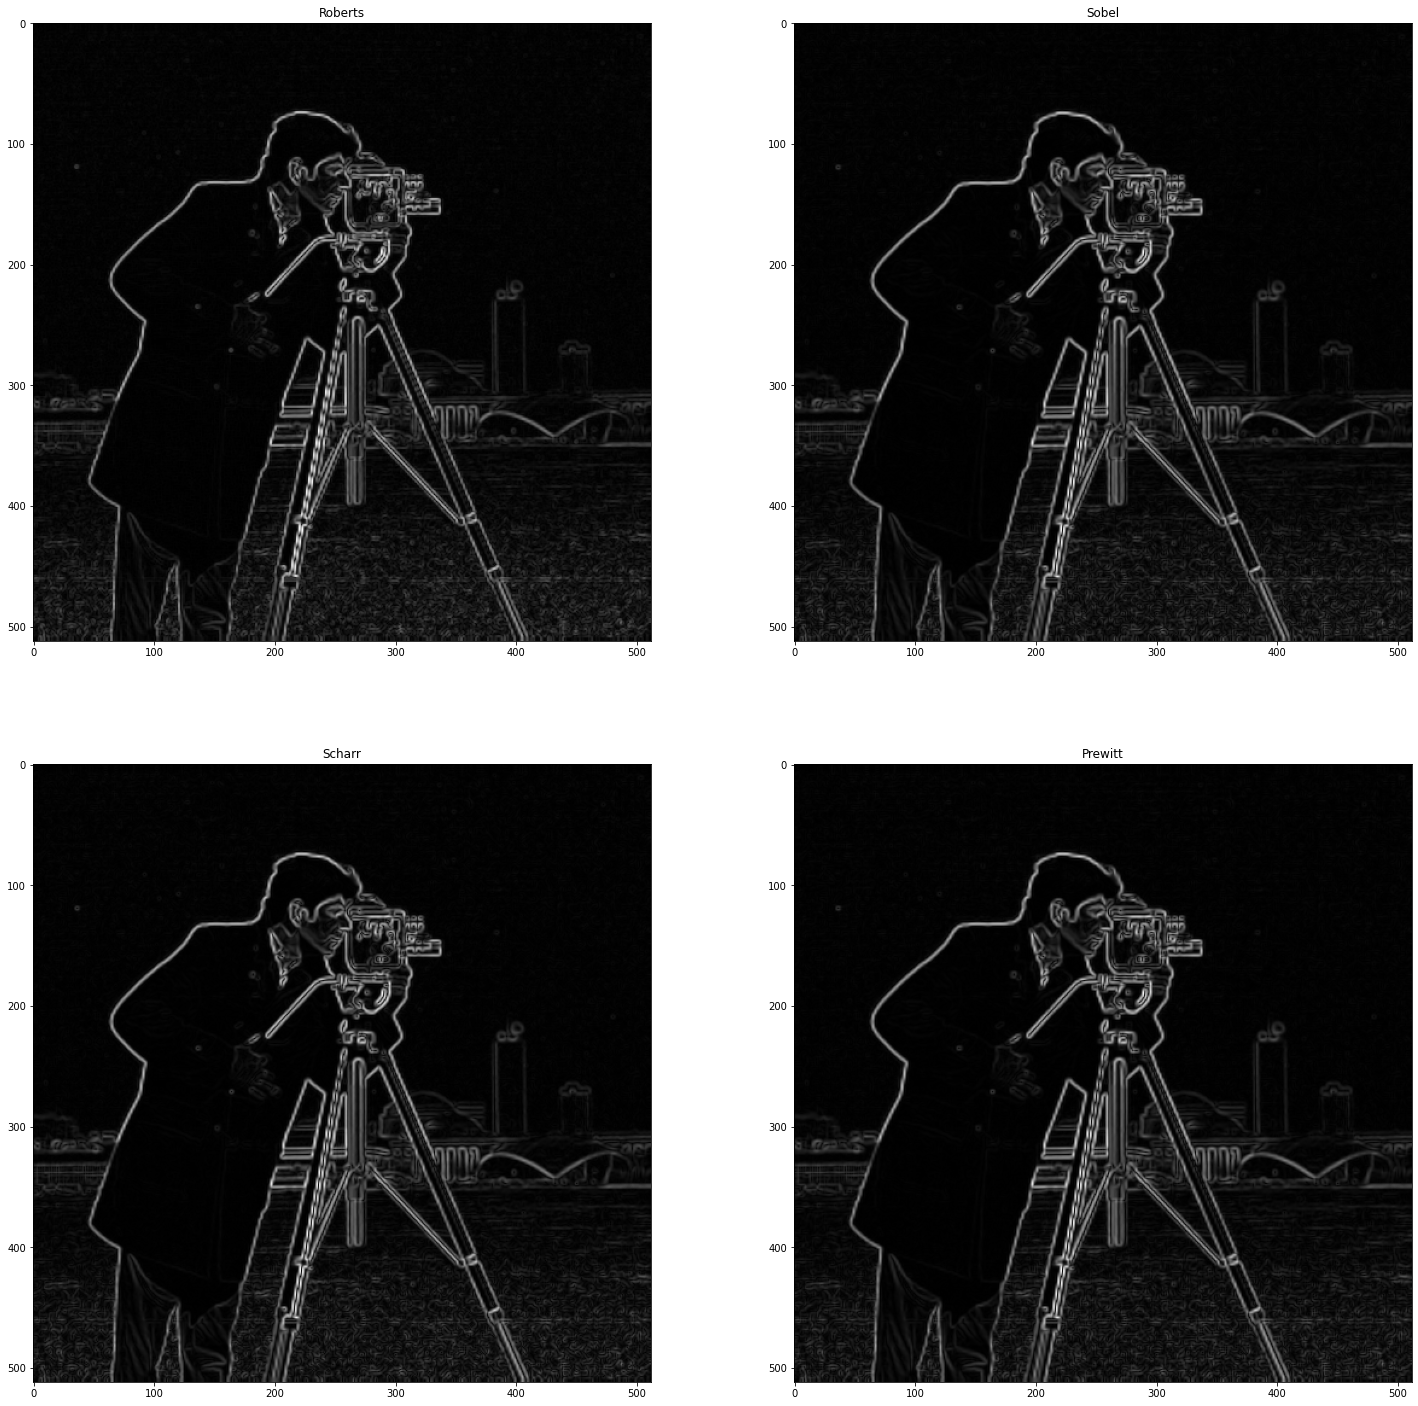

In [3]:
rob, sob, sch, prew = roberts(image), sobel(image), scharr(image), prewitt(image)


plt.figure(1, figsize=(25,25))

plt.subplot(221)
plt.title('Roberts')
plt.imshow(rob, cmap='gray')

plt.subplot(222)
plt.title('Sobel')
plt.imshow(sob, cmap='gray')

plt.subplot(223)
plt.title('Scharr')
plt.imshow(sch, cmap='gray')

plt.subplot(224)
plt.title('Prewitt')
plt.imshow(prew, cmap='gray')

In [4]:
from scipy import misc, signal
from scipy import ndimage
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu


In [11]:
im_flt = image.astype(float)

In [19]:
#scaling 0-1
im_flt = im_flt/np.max(image)
print(np.max(im_flt), im_flt.shape)

1.5378700499807765e-05 (512, 512)


In [25]:
import cv2

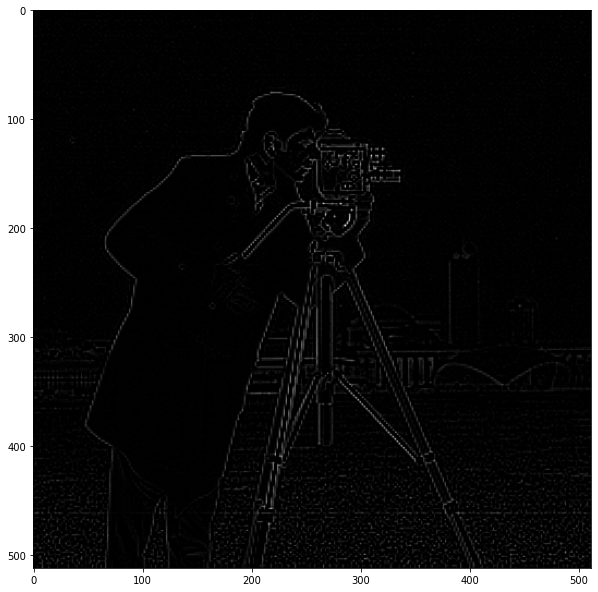

In [51]:
#defining laplace's kernel
lp_kernel = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
])
#applying the laplacian kernel
im_lp = cv2.filter2D(image, -1, lp_kernel)
plt.figure(figsize=(10,15))
plt.imshow(im_lp, cmap='gray')

#### Combining Spatial Enhancement Methods
Follow these steps:
-	a) Read an input image (grayscale)
-	b) Laplacian of a)
-	c) Add a) and b). By this, sharpened image will be obtained
-	d) Sobel of a)
-	e) Sobel image smoothed with a 5*5 averaging filter
-	f) Mask image formed by the product of (c) and (e).
-	g) Sharpened image obtained by the sum of (a) and (f).


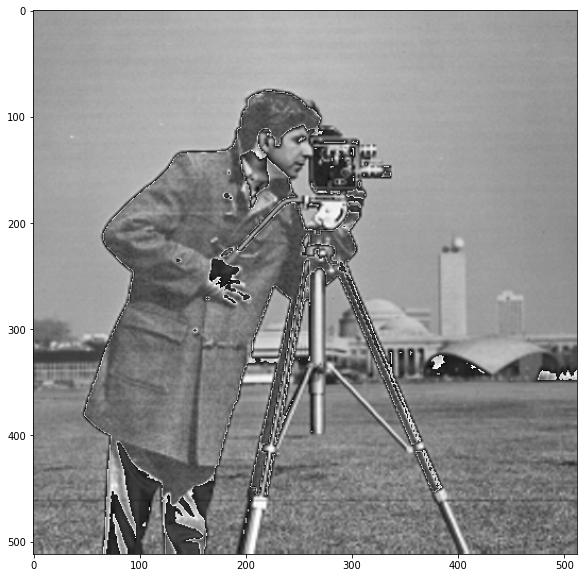

In [43]:
lp_kernel_pos = np.array([
        [0,1,0],
        [1,4,1],
        [0,1,0]
])
im_l_p = image + cv2.filter2D(image, -1, lp_kernel_pos)
plt.figure(figsize=(10,10))
plt.imshow(im_l_p, cmap='gray')

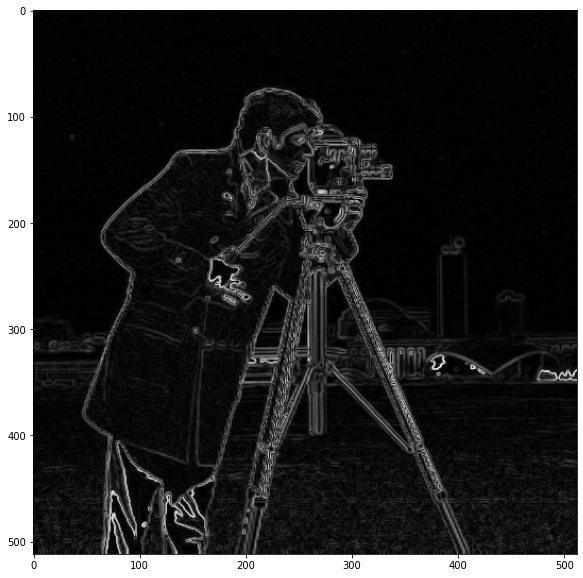

In [54]:
#sobel
im_sob_n = sobel(im_l_p)
plt.figure(figsize=(10,10))
plt.imshow(im_sob_n, cmap='gray')